<a href="https://colab.research.google.com/github/muhammed-sajid/Machine-Learning/blob/main/SkewnessSample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('ABC company.csv')
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


In [6]:
df['Salary'] = df['Salary'].fillna(df['Salary'].median())

In [7]:
df.isnull().sum()

,0
Name,0
Team,0
Number,0
Position,0
Age,0
Height,0
Weight,0
College,84
Salary,0


In [8]:
df.describe()

,Number,Age,Weight,Salary
count,458.000000,458.000000,458.000000,4.580000e+02
mean,17.713974,26.934498,221.543668,4.785988e+06
std,15.966837,4.400128,26.343200,5.172406e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.100150e+06
50%,13.000000,26.000000,220.000000,2.836186e+06
75%,25.000000,30.000000,240.000000,6.323553e+06
max,99.000000,40.000000,307.000000,2.500000e+07


In [9]:
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1
print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:",IQR)

Q1: 1100150.5
Q3: 6323553.0
IQR: 5223402.5


In [10]:
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
print("Upper Bound:", upper_bound)
print("Lower Bound:", lower_bound)

Upper Bound: 14158656.75
Lower Bound: -6734953.25


<Axes: xlabel='Salary'>

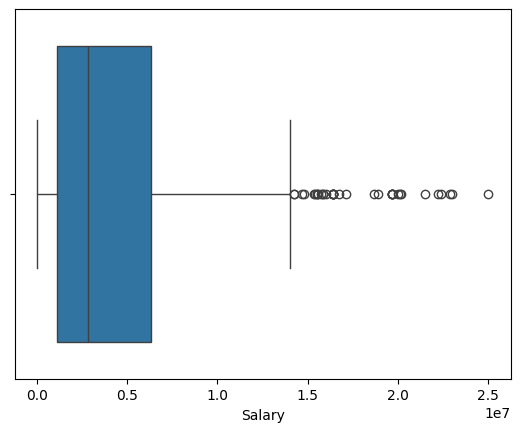

In [11]:
sns.boxplot(x=df['Salary'])

In [12]:
#find outliers
df.loc[(df['Salary'] > upper_bound) | (df['Salary'] < lower_bound)]

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
23,Brook Lopez,Brooklyn Nets,11,C,28,7-0,275,Stanford,19689000.0
33,Carmelo Anthony,New York Knicks,7,SF,32,06-Aug,240,Syracuse,22875000.0
82,Draymond Green,Golden State Warriors,23,PF,26,06-Jul,230,Michigan State,14260870.0
89,Klay Thompson,Golden State Warriors,11,SG,26,06-Jul,215,Washington State,15501000.0
96,Blake Griffin,Los Angeles Clippers,32,PF,27,06-Oct,251,Oklahoma,18907726.0
98,DeAndre Jordan,Los Angeles Clippers,6,C,27,06-Nov,265,Texas A&M,19689000.0
100,Chris Paul,Los Angeles Clippers,3,PG,31,6-0,175,Wake Forest,21468695.0
109,Kobe Bryant,Los Angeles Lakers,24,SF,37,06-Jun,212,NaN,25000000.0
111,Roy Hibbert,Los Angeles Lakers,17,C,29,07-Feb,270,Georgetown,15592217.0
143,DeMarcus Cousins,Sacramento Kings,15,C,25,06-Nov,270,Kentucky,15851950.0


In [13]:
#trimming- delete the outlier data
new_df = df.loc[(df['Salary'] < upper_bound) & (df['Salary'] > lower_bound)]
print("Before removing outliers:",len(df))
print("After removing outliers:", len(new_df))
print("outliers:",len(df)-len(new_df))

Before removing outliers: 458
After removing outliers: 421
outliers: 37


<Axes: xlabel='Salary'>

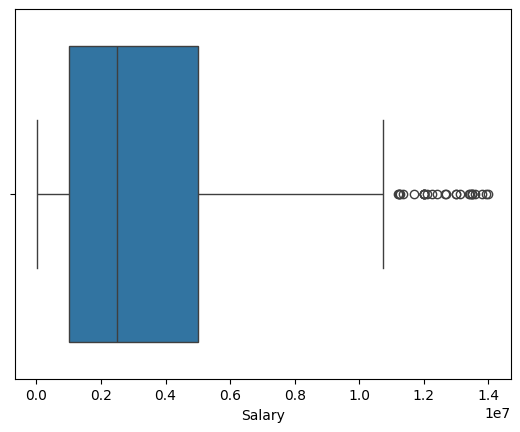

In [14]:
sns.boxplot(x=new_df['Salary'])

In [15]:
#capping - change the outlier value to upper (or)  lower limit values
new_df = df.copy()
new_df.loc[(new_df['Salary']> upper_bound), 'Salary'] = upper_bound
new_df.loc[(new_df['Salary']< lower_bound), 'Salary'] = lower_bound

<Axes: xlabel='Salary'>

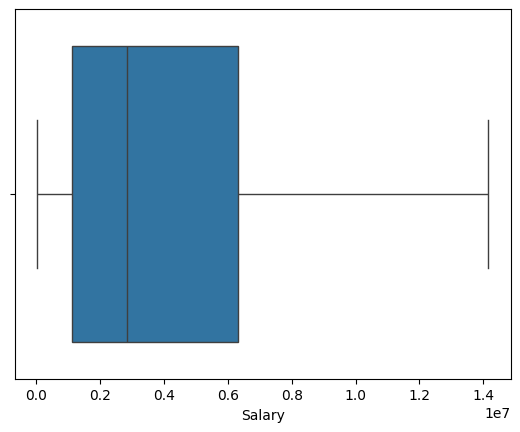

In [16]:
sns.boxplot(x=new_df['Salary'])

In [17]:
def visualize_skewness(new_df, column, title_prefix=" "):
  plt.figure(figsize=(10, 6))

  plt.subplot(1, 2, 1)
  sns.histplot(new_df[column], kde=True, bins=30, color='blue')
  plt.title(f"\n{title_prefix} Histogram of {column}")

  plt.subplot(1, 2, 2)
  sns.boxplot(x=new_df[column], color='green')
  plt.title(f"\n{title_prefix} Boxplot of {column}")
  plt.show()

Original salary distribution


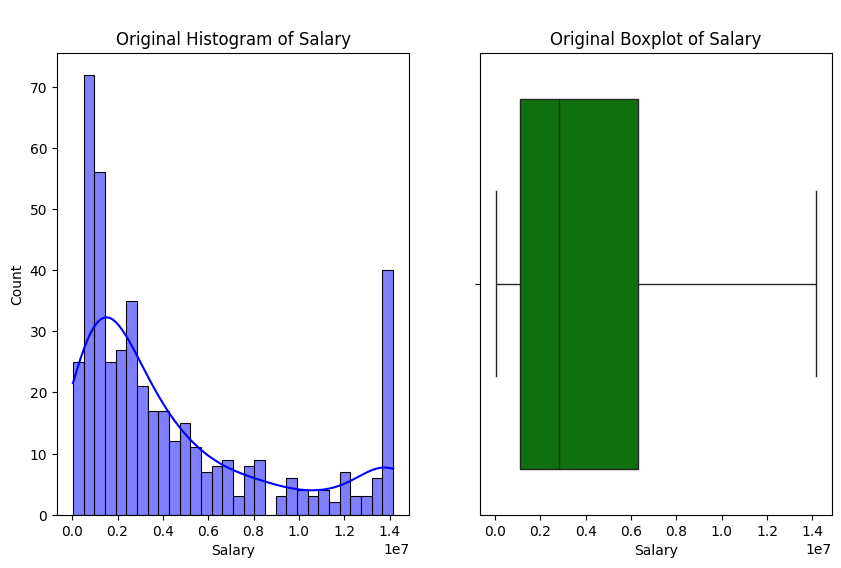

In [18]:
print("Original salary distribution")
visualize_skewness(new_df, 'Salary', title_prefix='Original')

In [19]:
# Apply square root transformation
new_df['Salary_Square_Root'] = np.sqrt(new_df['Salary'])

Square Root Transformed Salary Distribution


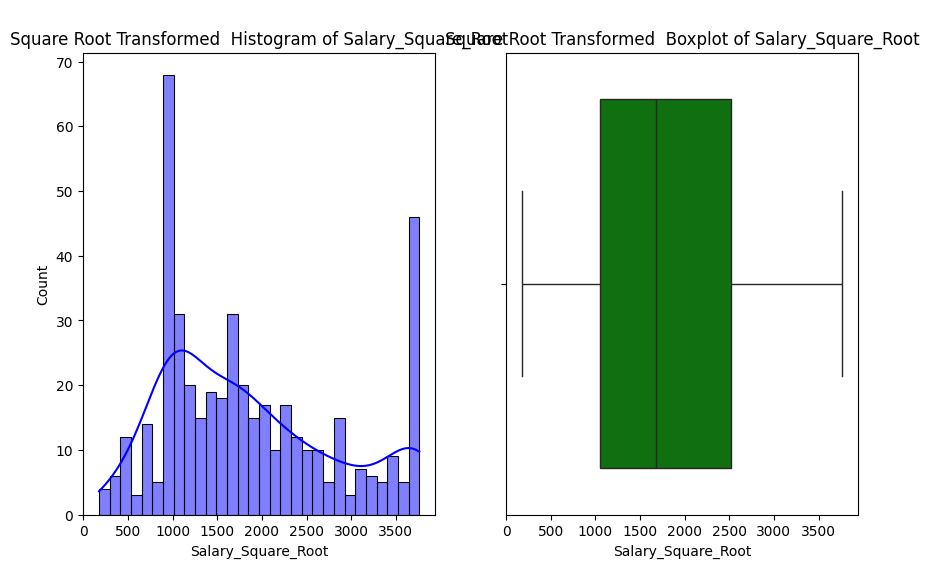

In [20]:
# Visualize square root transformed Salary distribution
print("Square Root Transformed Salary Distribution")
visualize_skewness(new_df, 'Salary_Square_Root', title_prefix="Square Root Transformed ")

In [21]:
# Apply log transformation (log1p to handle zeros safely)
new_df['Salary_Log'] = np.log1p(new_df['Salary'])

Log Transformed Salary Distribution


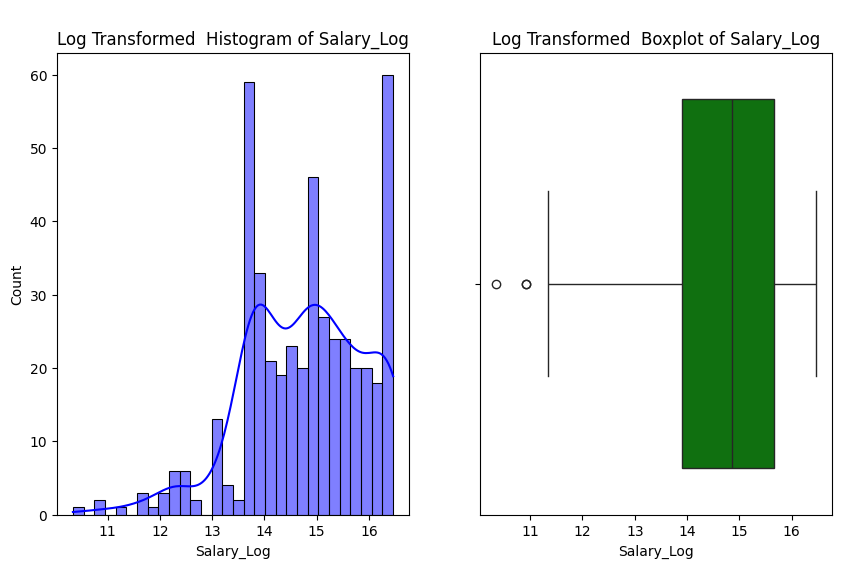

In [22]:
# Visualize log transformed Salary distribution
print("Log Transformed Salary Distribution")
visualize_skewness(new_df, 'Salary_Log', title_prefix="Log Transformed ")

In [25]:
# Skewness comparison
original_skew = new_df['Salary'].skew()
sqrt_skew = new_df['Salary_Square_Root'].skew()
log_skew = new_df['Salary_Log'].skew()

print("Skewness Comparison:")
print("Original skewness:", original_skew)
print("Square Root Skewness:", sqrt_skew)
print("Log Skewness:", log_skew)

Skewness Comparison:
Original skewness: 1.1521134646824394
Square Root Skewness: 0.5915339101007694
Log Skewness: -0.5237833478759322
